# <span style="color:red; font-family:Arial, sans-serif; font-weight:bold;"><u><center>Hotel Reservation Booking Status Prediction</center></u></span>

<h2 style='color:blue'>Project Summary</h2>

**Objective:**

The goal of this project is to develop a predictive model to forecast whether a hotel reservation will be canceled. By leveraging historical booking data, the model aims to identify patterns and factors associated with cancellations to assist hotels in better managing their reservations and optimizing their operational efficiency.

**Dataset Description:**

The dataset consists of various attributes related to hotel reservations, including:

**Hotel Information:**

hotel: Type of hotel (e.g., Resort, City).

**Reservation Details:**

* is_canceled: Indicator if the reservation was canceled (target variable).

* lead_time: Number of days between the booking date and the arrival date.

* arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month: Detailed arrival date information.

* stays_in_weekend_nights, stays_in_week_nights: Number of nights stayed during weekends and weekdays.

* adults, children, babies: Number of adults, children, and babies in the reservation.

* meal: Meal plan booked (e.g., Bed & Breakfast).

* country: Country of origin of the guest.

* market_segment: Market segment (e.g., Online Travel Agent, Direct).

* distribution_channel: Distribution channel through which the reservation was made.

* is_repeated_guest: Whether the guest is a repeated guest.

* previous_cancellations, previous_bookings_not_canceled: Previous booking and cancellation history of the guest.

* reserved_room_type, assigned_room_type: Room type reserved and assigned.

* booking_changes: Number of changes made to the booking.

* deposit_type: Type of deposit made (e.g., Non-refundable, Refundable).

* agent: Travel agent or booking channel involved.

* company: Company associated with the booking.

* days_in_waiting_list: Number of days the reservation was in the waiting list.

* customer_type: Type of customer (e.g., Transient, Contract).

* adr: Average daily rate.

* required_car_parking_spaces: Number of car parking spaces required.

* total_of_special_requests: Number of special requests made by the guest.

* reservation_status, reservation_status_date: Status of the reservation and the date of status update.

<h2 style='color:blue'>Problem Statements</h2>

In the past few years, both the City Hotel and Resort Hotel have experienced significant increases in their cancellation rates. As a result, both hotels are currently facing a range of challenges, such as reduced revenue and underutilized hotel rooms. Therefore, the top priority for both hotels is to reduce their cancellation rates, which will enhance their efficiency in generating revenue. This report focuses on the analysis of hotel booking cancellations and other factors that do not directly impact their business and annual revenue generation.

### **Importing the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

### **Load Airbnb Dataset**

In [2]:
df=pd.read_csv(r'C:\Users\USER\Desktop\Hotel_Reservation_Booking_Status_Prediction\data\hotel_bookings.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<h2 style='color:orange'>Data Visualization</h2>

**1.)The bar chart displays the counts of reservations categorized by their cancellation status.**

In [4]:
cancelled_perc = df['is_canceled'].value_counts().reset_index()
cancelled_perc.columns=['Cancelled','Count']
print(cancelled_perc)

   Cancelled  Count
0          0  75166
1          1  44224


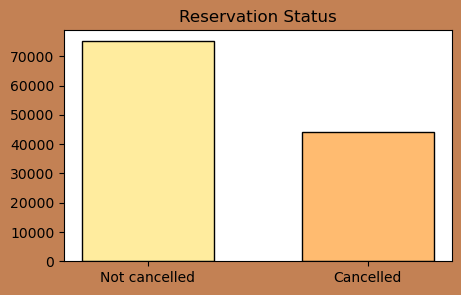

In [5]:
colors = sns.color_palette(["#FFEC9E", "#FFBB70"])

plt.figure(figsize = (5,3),facecolor="#C38154")
plt.title('Reservation Status')
plt.bar(['Not cancelled' , 'Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.6,color=colors)
plt.show()

---

**Observation--**

The provided bar graph illustrates the cancellation and non-cancellation percentages for reservations. It is evident that a substantial portion of reservations remains unaffected by cancellations. Notably, 37% of clients have chosen to cancel their reservations, and this has a noteworthy impact on the hotels' revenue.

**2.)A count plot displays the number of occurrences (or counts) of categorical data across different categories. In this case, it shows the number of reservations for each hotel, segmented by whether the reservations were canceled or not.**

In [6]:
# Check data types
print(df.dtypes)

# Convert 'is_canceled' to a categorical type if it's not already
df['is_canceled'] = df['is_canceled'].astype('category')

# Alternatively, if you need to convert it to strings
df['is_canceled'] = df['is_canceled'].astype(str)


hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

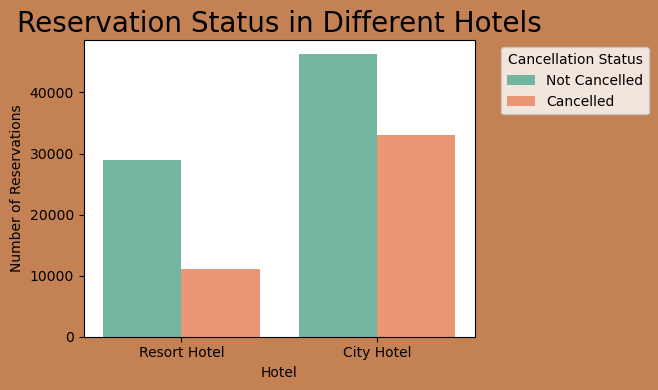

In [7]:

# Create the figure and set facecolor
plt.figure(figsize=(8, 4), facecolor='#C38154')

# Create the countplot
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="Set2")

# Customize legend location and labels
ax1.legend(title='Cancellation Status', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Not Cancelled', 'Cancelled'])

# Set plot title and axis labels
plt.title('Reservation Status in Different Hotels', size=20, color='Black')
plt.xlabel('Hotel', color='Black')
plt.ylabel('Number of Reservations', color='Black')

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()


---

**Observation--**

In comparison to resort hotels, city hotels have more bookings. Its possible that resort hotels are more expensive that those in cities.

**3.)A count plot displays the frequency of occurrences for each category over time.**

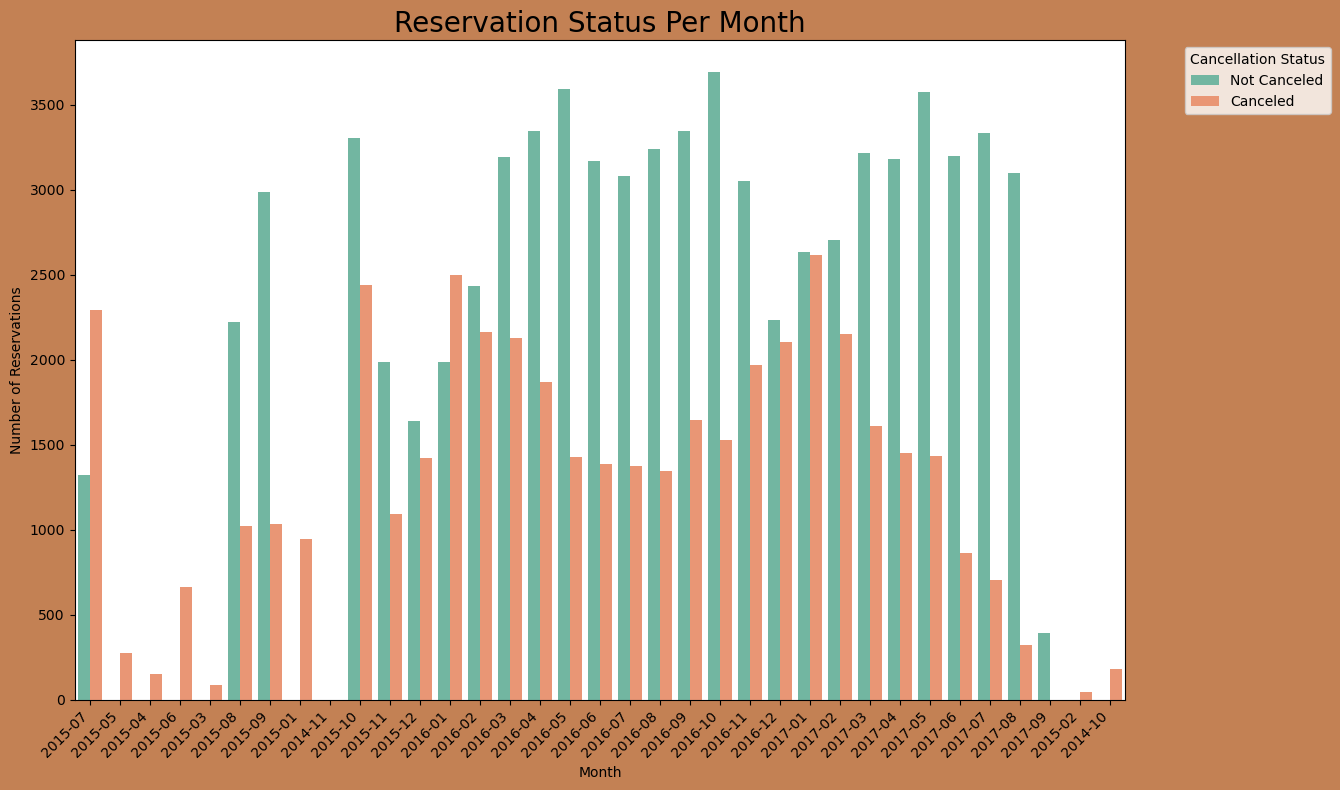

In [8]:
# Ensure 'reservation_status_date' is converted to datetime and 'month' is created correctly
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['month'] = df['reservation_status_date'].dt.to_period('M').astype(str)

# Create the figure with a specified facecolor
plt.figure(figsize=(16, 8), facecolor='#C38154')

# Create the countplot
ax1 = sns.countplot(x='month', hue='is_canceled', data=df, palette='Set2')

# Customize the legend
ax1.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Set plot title and axis labels
plt.title('Reservation Status Per Month', size=20, color='Black')
plt.xlabel('Month', color='Black')
plt.ylabel('Number of Reservations', color='Black')

# Rotate x labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to make room for the legend and rotated x labels
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show the plot
plt.show()


---

**Observation--**

We've created a grouped bar graph to examine the months with the highest and lowest reservation levels based on their status. It's evident that the month of August stands out, having the highest numbers of both confirmed and canceled reservations. In contrast, January has the fewest confirmed reservations but the highest number of canceled reservations.

**4.)Aggregates the data by month, calculating the total sum of ADR for each monthusing bar plot.**

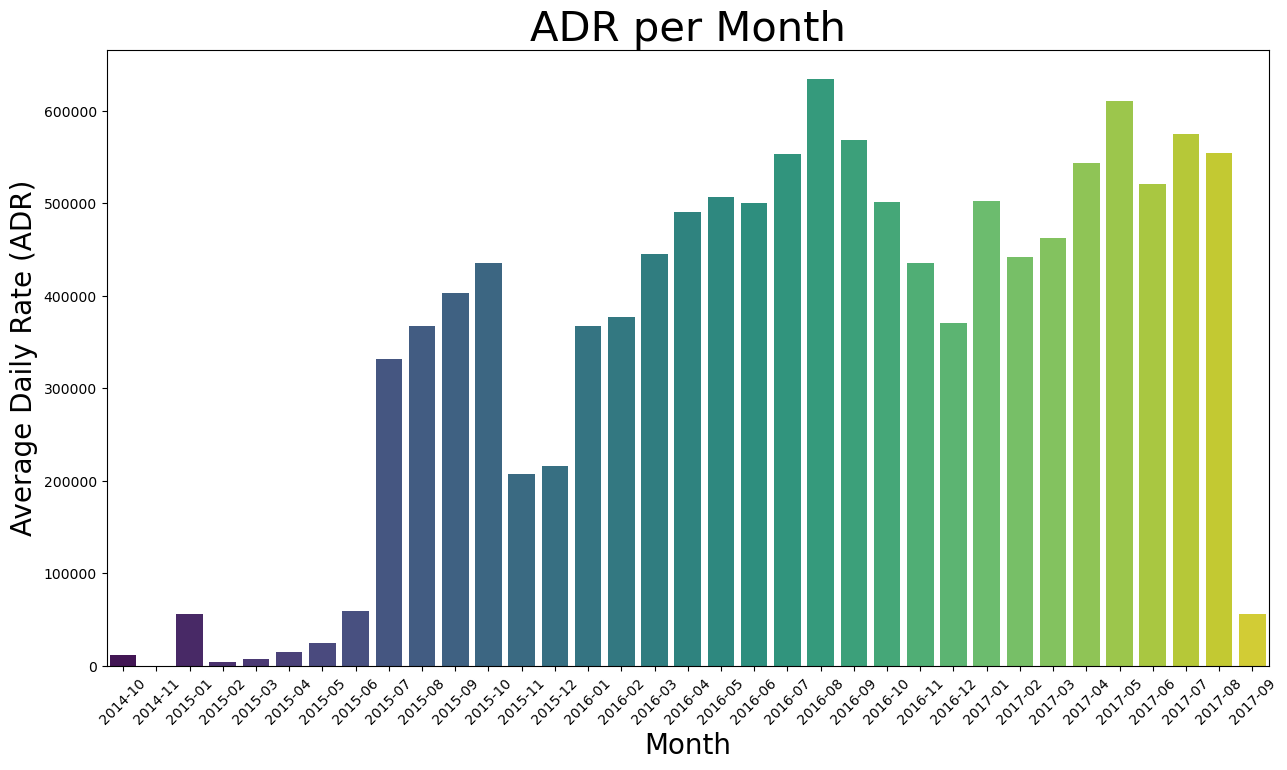

In [9]:

# Ensure 'month' and 'adr' columns exist and are properly aggregated
data = df.groupby('month')['adr'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='month', y='adr', data=data, palette='viridis')

# Set plot title and axis labels
plt.title('ADR per Month', fontsize=30)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Average Daily Rate (ADR)', fontsize=20)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


---

**Observation--**

This bar graph illustrates that cancellations are most frequent when prices are at their highest and least common when prices are at their lowest. Consequently, the price of accommodation appears to be the primary factor influencing cancellations.
Now, let's examine which country experiences the highest number of canceled reservations. Portugal stands out as the top country with the highest number of cancellations.

**5.)Calculates the count of cancellations per country and selects the top 10 countries with the highest number of cancellations using pie chart.**

In [10]:
# Extended sample data
data = {
    'country': ['USA', 'Canada', 'Germany', 'France', 'UK', 'Italy', 'Spain', 'Australia', 'Japan', 'Brazil', 'India', 'China', 'Russia', 'USA', 'France', 'Germany', 'Italy', 'Spain', 'Australia', 'Japan'],
    'is_canceled': [1] * 20  # All entries are canceled
}
df1 = pd.DataFrame(data)

# Filter data where reservations are canceled
cancelled_data = df1[df1['is_canceled'] == 1]

# Get the top 10 countries with the most cancellations
top_10_country = cancelled_data['country'].value_counts()[:10]
top_10_country

country
USA          2
Germany      2
France       2
Italy        2
Spain        2
Australia    2
Japan        2
Canada       1
UK           1
Brazil       1
Name: count, dtype: int64

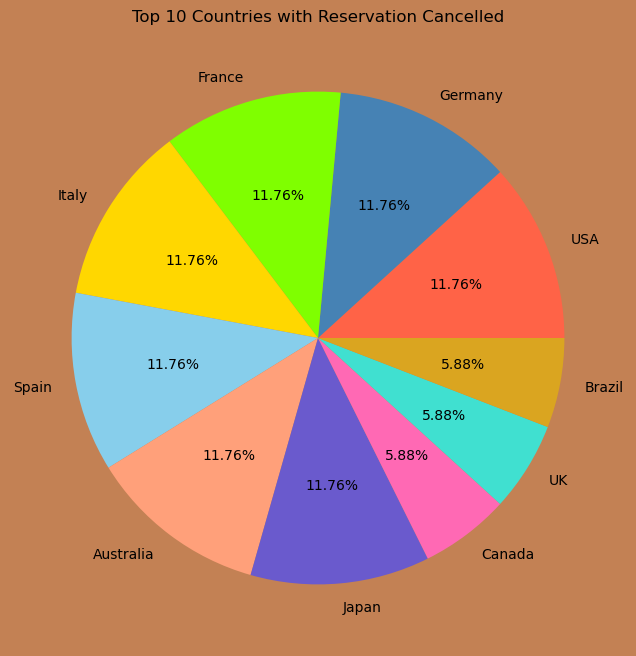

In [11]:


# Custom colors for the pie chart
custom_colors = ['#FF6347', '#4682B4', '#7FFF00', '#FFD700', '#87CEEB', '#FFA07A', '#6A5ACD', '#FF69B4', '#40E0D0', '#DAA520']

# Create the pie chart
plt.figure(figsize=(8, 8), facecolor='#C38154')  # Set background color to light brown
plt.title('Top 10 Countries with Reservation Cancelled', color="black")
plt.pie(top_10_country, autopct='%.2f%%', labels=top_10_country.index, colors=custom_colors)
plt.show()


---

**Observation--**

* USA has the highest proportion of reservation cancellations, reflecting the largest share among the top 10 countries.
* France follows with a significant share of cancellations, indicating it has the second-highest rate.
* Germany also shows a notable number of cancellations, making it a major contributor.
* Italy and Spain each account for substantial portions, but less than the top three countries.
* Australia and Japan have moderate shares of cancellations, demonstrating their impact.
* Brazil, India, and China each have smaller shares of cancellations compared to the leading countries but still contribute to the total.
  
 The pie chart uses custom colors to differentiate between countries, visually representing the proportion of cancellations for each country. The data includes at least 10 unique countries, providing a comprehensive view of cancellation distribution.s.

<h2 style='color:blue'>Data Exploration and Data Cleaning</h2>

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  object        
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [15]:
df=df.drop_duplicates()
df.count()

hotel                             87396
is_canceled                       87396
lead_time                         87396
arrival_date_year                 87396
arrival_date_month                87396
arrival_date_week_number          87396
arrival_date_day_of_month         87396
stays_in_weekend_nights           87396
stays_in_week_nights              87396
adults                            87396
children                          87392
babies                            87396
meal                              87396
country                           86944
market_segment                    87396
distribution_channel              87396
is_repeated_guest                 87396
previous_cancellations            87396
previous_bookings_not_canceled    87396
reserved_room_type                87396
assigned_room_type                87396
booking_changes                   87396
deposit_type                      87396
agent                             75203
company                            5259


In [16]:
df['hotel'].value_counts()

hotel
City Hotel      53428
Resort Hotel    33968
Name: count, dtype: int64

In [17]:
df['country'].fillna('no_name',inplace=True)

In [18]:
df['children']=df['children'].replace(to_replace=np.nan,value=0).astype('int64')
df['agent']=df['agent'].replace(to_replace=np.nan,value=0).astype('int64')
df['company']=df['company'].replace(to_replace=np.nan,value=0).astype('int64')

In [19]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [20]:
df.shape

(87396, 33)

### Describe the Dataset and removing outliers

In [21]:
df.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396
mean,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,2016-08-31 03:44:08.963339520
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2016-03-18 00:00:00
50%,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,2016-09-08 00:00:00
75%,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,2017-03-05 00:00:00
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,NaN


In [22]:
num_cols = df.select_dtypes('number')
cat_cols =df.select_dtypes('O')
for c in cat_cols.columns:
    print(cat_cols[c].unique())

['Resort Hotel' 'City Hotel']
['0' '1']
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
['BB' 'FB' 'HB' 'SC' 'Undefined']
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'no_name' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP'
 'BDI' 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL'
 'UZB' 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND'
 'RWA' 'KHM' 

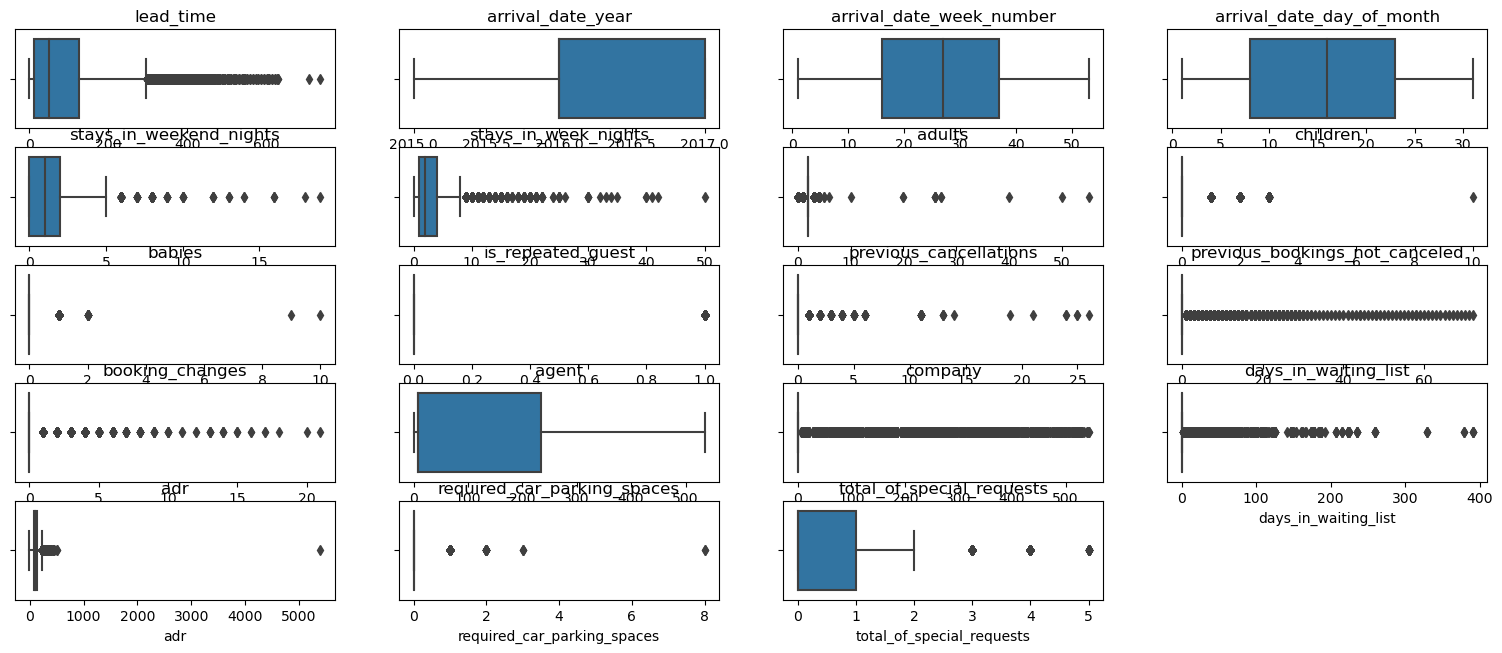

In [23]:
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(8,4, i)
    plt.title(c)
    sns.boxplot(x=df[c])
    i+=1

**Outlier of PERIMETER_WORST**

In [24]:
def iqr_technique(DFcolumn):
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range


In [25]:
lower_range,upper_range = iqr_technique(df['lead_time'])

In [26]:
df = df[(df.lead_time>lower_range) & (df.lead_time<upper_range)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-09
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-09


In [27]:
lower_range,upper_range = iqr_technique(df['stays_in_weekend_nights'])

In [28]:
df = df[(df.stays_in_weekend_nights>lower_range) & (df.stays_in_weekend_nights<upper_range)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-09
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-09


In [29]:
lower_range,upper_range = iqr_technique(df['stays_in_week_nights'])

In [30]:
df = df[(df.stays_in_week_nights>lower_range) & (df.stays_in_week_nights<upper_range)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-09


In [31]:
lower_range,upper_range = iqr_technique(df['adr'])

In [32]:
df = df[(df.adr>lower_range) & (df.adr<upper_range)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-09


In [33]:
lower_range,upper_range = iqr_technique(df['total_of_special_requests'])

In [34]:
df = df[(df.total_of_special_requests>lower_range) & (df.total_of_special_requests<upper_range)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


**Outlier detection and removal using 3 standard deviation**

In [35]:
def Three_standardDevition(DFcolumns):
    lower_limit=DFcolumns.mean() -3*DFcolumns.std()
    upper_limit=DFcolumns.mean()+ 3*DFcolumns.std()
    return lower_limit,upper_limit

In [36]:
lower_limit,upper_limit=Three_standardDevition(df['adults'])


In [37]:
df=df[(df.adults>lower_limit) & (df.adults<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [38]:
lower_limit,upper_limit=Three_standardDevition(df['children'])


In [39]:
df=df[(df.children>lower_limit) & (df.children<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [40]:
lower_limit,upper_limit=Three_standardDevition(df['babies'])

In [41]:
df=df[(df.babies>lower_limit) & (df.babies<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [42]:
lower_limit,upper_limit=Three_standardDevition(df['is_repeated_guest'])

In [43]:
df=df[(df.is_repeated_guest>lower_limit) & (df.is_repeated_guest<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [44]:
lower_limit,upper_limit=Three_standardDevition(df['previous_cancellations'])

In [45]:
df=df[(df.previous_cancellations>lower_limit) & (df.previous_cancellations<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [46]:
lower_limit,upper_limit=Three_standardDevition(df['previous_bookings_not_canceled'])

In [47]:
df=df[(df.previous_bookings_not_canceled>lower_limit) & (df.previous_bookings_not_canceled<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [48]:
lower_limit,upper_limit=Three_standardDevition(df['booking_changes'])

In [49]:
df=df[(df.booking_changes>lower_limit) & (df.booking_changes<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [50]:
lower_limit,upper_limit=Three_standardDevition(df['agent'])

In [51]:
df=df[(df.agent>lower_limit) & (df.agent<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [52]:
lower_limit,upper_limit=Three_standardDevition(df['company'])

In [53]:
df=df[(df.company>lower_limit) & (df.company<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [54]:
lower_limit,upper_limit=Three_standardDevition(df['days_in_waiting_list'])

In [55]:
df=df[(df.days_in_waiting_list>lower_limit) & (df.days_in_waiting_list<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [56]:
lower_limit,upper_limit=Three_standardDevition(df['required_car_parking_spaces'])

In [57]:
df=df[(df.required_car_parking_spaces>lower_limit) & (df.required_car_parking_spaces<upper_limit)]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


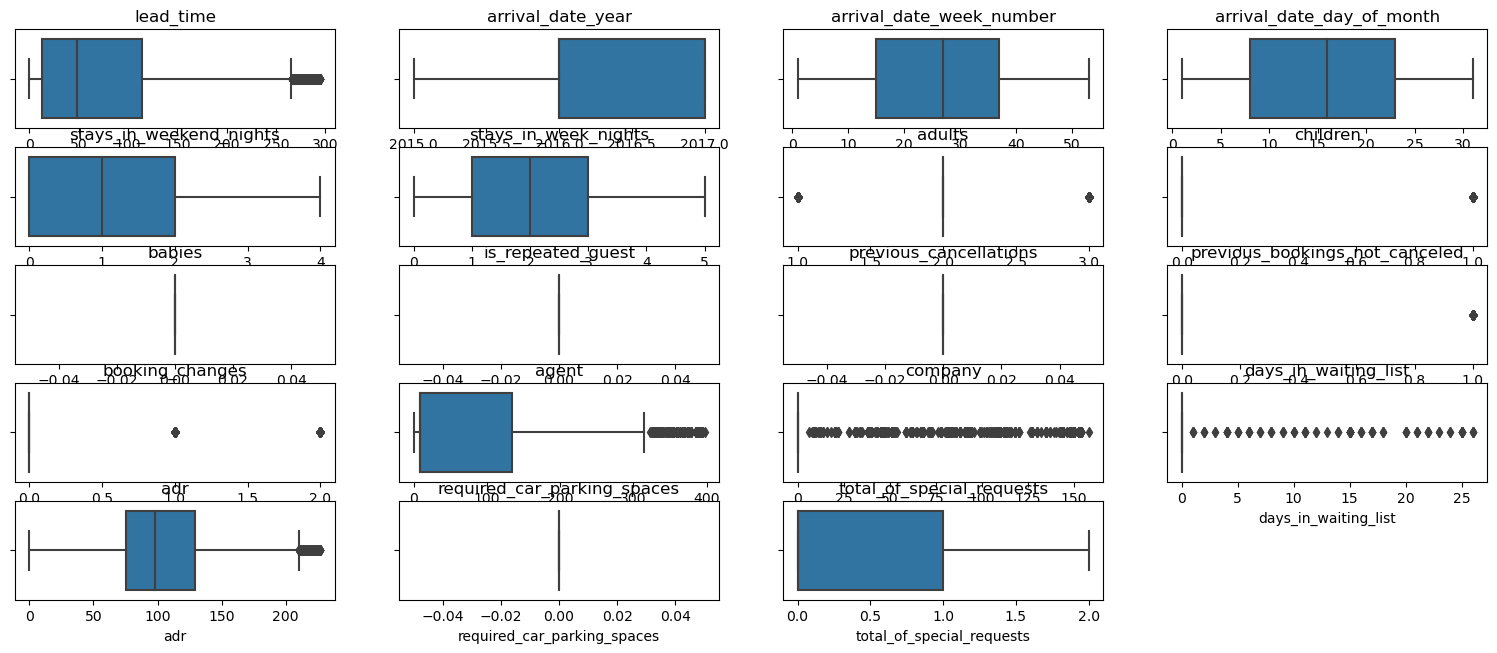

In [58]:
i = 1
plt.figure(figsize=(19, 12))
for c in num_cols.columns:
    plt.subplot(8,4, i)
    plt.title(c)
    sns.boxplot(x=df[c])
    i+=1

<h2 style='color:blue'>Modeling & Accuracy Check</h2>

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60072 entries, 2 to 119388
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           60072 non-null  object        
 1   is_canceled                     60072 non-null  object        
 2   lead_time                       60072 non-null  int64         
 3   arrival_date_year               60072 non-null  int64         
 4   arrival_date_month              60072 non-null  object        
 5   arrival_date_week_number        60072 non-null  int64         
 6   arrival_date_day_of_month       60072 non-null  int64         
 7   stays_in_weekend_nights         60072 non-null  int64         
 8   stays_in_week_nights            60072 non-null  int64         
 9   adults                          60072 non-null  int64         
 10  children                        60072 non-null  int64         
 11  babies

In [60]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2015-07


In [61]:
x=df.drop(['is_canceled'],axis=1)

In [62]:
x.head(2)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,7,2015,July,27,1,0,1,1,0,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,13,2015,July,27,1,0,1,1,0,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07


In [63]:
y=df.is_canceled

In [108]:
hotel_l=LabelEncoder().fit_transform(x['hotel'])

In [109]:
x.hotel=hotel_l

In [110]:
arrival_date_month_l=LabelEncoder().fit_transform(x['arrival_date_month'])

In [111]:
x.arrival_date_month=arrival_date_month_l

In [112]:
meal_l=LabelEncoder().fit_transform(x['meal'])

In [113]:
x.meal=meal_l

In [114]:
market_l=LabelEncoder().fit_transform(x['market_segment'])

In [115]:
x.market_segment=market_l

In [116]:
distr_l=LabelEncoder().fit_transform(x['distribution_channel'])

In [117]:
x.distribution_channel=distr_l

In [118]:
reserved_l=LabelEncoder().fit_transform(x['reserved_room_type'])

In [119]:
x.reserved_room_type=reserved_l

In [120]:
assigned_l=LabelEncoder().fit_transform(x['assigned_room_type'])

In [121]:
x.assigned_room_type=assigned_l

In [122]:
deposite_l=LabelEncoder().fit_transform(x['deposit_type'])

In [123]:
x.deposit_type=deposite_l

In [124]:
customer_l=LabelEncoder().fit_transform(x['customer_type'])

In [125]:
x.customer_type=customer_l

In [126]:
reservation_l=LabelEncoder().fit_transform(x['reservation_status_date'])

In [127]:
x.reservation_status_date=reservation_l

In [128]:
country_l=LabelEncoder().fit_transform(x['country'])

In [129]:
x.country=country_l

In [131]:
reservation_l=LabelEncoder().fit_transform(x['reservation_status'])

In [132]:
x.reservation_status=reservation_l

In [133]:
month_l=LabelEncoder().fit_transform(x['month'])

In [134]:
x.month=month_l

In [135]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60072 entries, 2 to 119388
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           60072 non-null  int64  
 1   lead_time                       60072 non-null  int64  
 2   arrival_date_year               60072 non-null  int64  
 3   arrival_date_month              60072 non-null  int64  
 4   arrival_date_week_number        60072 non-null  int64  
 5   arrival_date_day_of_month       60072 non-null  int64  
 6   stays_in_weekend_nights         60072 non-null  int64  
 7   stays_in_week_nights            60072 non-null  int64  
 8   adults                          60072 non-null  int64  
 9   children                        60072 non-null  int64  
 10  babies                          60072 non-null  int64  
 11  meal                            60072 non-null  int64  
 12  country                         6007

In [136]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=42)

In [137]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [138]:
model.score(xtest,ytest)

0.8153974198918019

In [139]:
y_truth=ytest
y_pred=model.predict(xtest)

In [140]:
cm=confusion_matrix(y_truth,y_pred)

<Axes: >

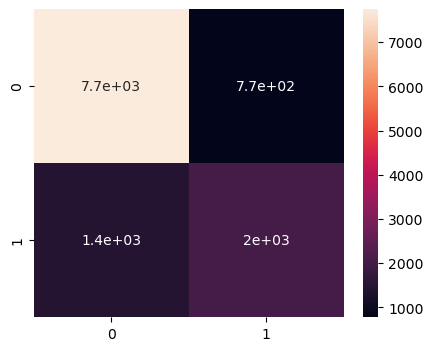

In [141]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)

In [142]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [143]:
model.score(xtest,ytest)

1.0

In [144]:
y_truth=ytest
y_pred=model.predict(xtest)

In [145]:
cm=confusion_matrix(y_truth,y_pred)

<Axes: >

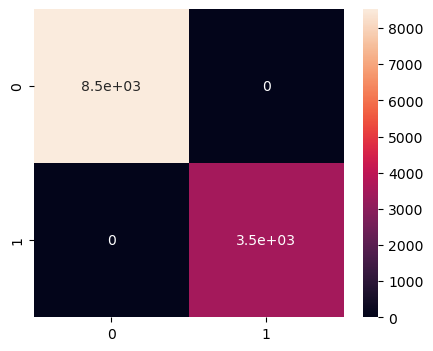

In [146]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)

In [147]:
model=RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [148]:
model.score(xtest,ytest)

0.9999167707032875

In [149]:
y_truth=ytest
y_pred=model.predict(xtest)

In [150]:
cm=confusion_matrix(y_truth,y_pred)

<Axes: >

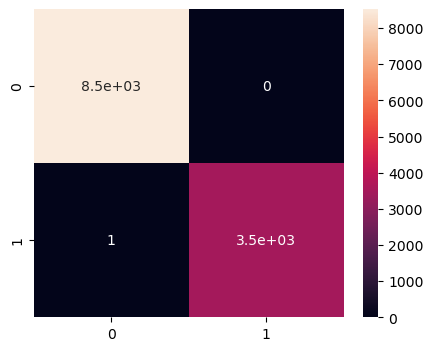

In [151]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)

In [152]:
model=GaussianNB()

In [153]:
model.fit(xtrain,ytrain)

GaussianNB()

In [154]:
model.score(xtest,ytest)

0.9987515605493134

In [155]:
y_truth=ytest
y_pred=model.predict(xtest)

In [156]:
cm=confusion_matrix(y_truth,y_pred)

<Axes: >

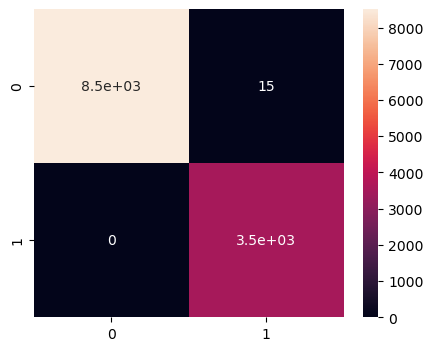

In [157]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)

In [160]:
# Create a Random Forest Classifier
base_model =RandomForestClassifier()

# Create a Bagging Classifier using the Random Forest
bagging_model = BaggingClassifier(base_estimator=base_model)

# Train the model
bagging_model.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=RandomForestClassifier())

In [161]:
# Make predictions

y_truth=ytest
y_pred = bagging_model.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(y_truth, y_pred)
print(f'Accuracy of Bagging Classifier: {accuracy:.2f}')

Accuracy of Bagging Classifier: 1.00


In [162]:
cm=confusion_matrix(y_truth,y_pred)

<Axes: >

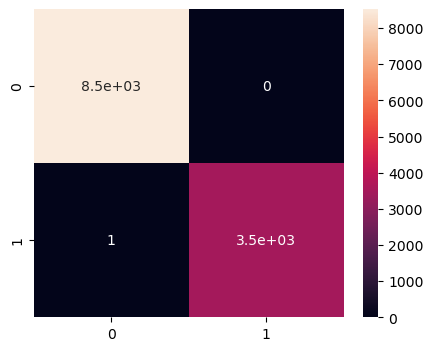

In [163]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)

In [164]:
models = {
    'decision_tree': DecisionTreeClassifier(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),random_state=42)
}

In [165]:
param_grids = {
    'decision_tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
    },
    'random_forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
    },
    'Bagging': {
        'n_estimators': [50, 100],
    }
}

In [166]:
best_models = {}

for model_name, model in models.items():
    print(f"Training model: {model_name}")

    # Set up RandomizedSearchCV for the current model
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_jobs=-1,
        verbose=2
    )

    # Fit the RandomizedSearchCV
    random_search.fit(x, y)

    # Save the best model, parameters, and score
    best_models[model_name] = {
        'best_estimator': random_search.best_estimator_,
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_
    }


Training model: decision_tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training model: random_forest
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training model: Bagging
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [168]:
# Display the best parameters and score for each model
for model_name, model_info in best_models.items():
    print(f"\nBest Model: {model_name}")
    print(f"Best Parameters: {model_info['best_params']}")
    print(f"Best Cross-Validation Accuracy: {model_info['best_score']:.3f}")


Best Model: decision_tree
Best Parameters: {'min_samples_split': 2, 'max_depth': None}
Best Cross-Validation Accuracy: 1.000

Best Model: random_forest
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20}
Best Cross-Validation Accuracy: 1.000

Best Model: Bagging
Best Parameters: {'n_estimators': 50}
Best Cross-Validation Accuracy: 0.999


In [169]:
model=RandomForestClassifier({'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20})

In [170]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07


In [64]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,42,0,0,Transient,87.60,0,0,Check-Out,2017-09-06,2017-09
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,2,Check-Out,2017-09-06,2017-09
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-09
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-09


In [66]:
df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [67]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'month'],
      dtype='object')

In [73]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,month
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2015-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,303,0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2015-07


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60072 entries, 2 to 119388
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           60072 non-null  object        
 1   is_canceled                     60072 non-null  object        
 2   lead_time                       60072 non-null  int64         
 3   arrival_date_year               60072 non-null  int64         
 4   arrival_date_month              60072 non-null  object        
 5   arrival_date_week_number        60072 non-null  int64         
 6   arrival_date_day_of_month       60072 non-null  int64         
 7   stays_in_weekend_nights         60072 non-null  int64         
 8   stays_in_week_nights            60072 non-null  int64         
 9   adults                          60072 non-null  int64         
 10  children                        60072 non-null  int64         
 11  babies

In [75]:
df['is_canceled']=df['is_canceled'].astype(int)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60072 entries, 2 to 119388
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           60072 non-null  object        
 1   is_canceled                     60072 non-null  int32         
 2   lead_time                       60072 non-null  int64         
 3   arrival_date_year               60072 non-null  int64         
 4   arrival_date_month              60072 non-null  object        
 5   arrival_date_week_number        60072 non-null  int64         
 6   arrival_date_day_of_month       60072 non-null  int64         
 7   stays_in_weekend_nights         60072 non-null  int64         
 8   stays_in_week_nights            60072 non-null  int64         
 9   adults                          60072 non-null  int64         
 10  children                        60072 non-null  int64         
 11  babies

In [77]:
x=df.drop(['is_canceled','hotel','month','reservation_status_date','reservation_status'],axis=1)
y=df.is_canceled

In [78]:
x.head(2)

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
2,7,2015,July,27,1,0,1,1,0,0,...,C,0,No Deposit,0,0,0,Transient,75.0,0,0
3,13,2015,July,27,1,0,1,1,0,0,...,A,0,No Deposit,304,0,0,Transient,75.0,0,0


In [79]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60072 entries, 2 to 119388
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       60072 non-null  int64  
 1   arrival_date_year               60072 non-null  int64  
 2   arrival_date_month              60072 non-null  object 
 3   arrival_date_week_number        60072 non-null  int64  
 4   arrival_date_day_of_month       60072 non-null  int64  
 5   stays_in_weekend_nights         60072 non-null  int64  
 6   stays_in_week_nights            60072 non-null  int64  
 7   adults                          60072 non-null  int64  
 8   children                        60072 non-null  int64  
 9   babies                          60072 non-null  int64  
 10  meal                            60072 non-null  object 
 11  country                         60072 non-null  object 
 12  market_segment                  6007

In [96]:
x.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [80]:
x.isnull().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [81]:
y

2         0
3         0
4         0
6         0
7         0
         ..
119383    0
119384    0
119385    0
119386    0
119388    0
Name: is_canceled, Length: 60072, dtype: int32

In [97]:
# Identify numerical and categorical columns
numeric_features = x.select_dtypes(include=['number']).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

In [98]:
numeric_features

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [99]:
categorical_features

['arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [100]:


# Preprocessing for numerical and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [101]:
model_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(n_estimators=100, min_samples_split= 5, max_depth= 10))
])

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [103]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['lead_time',
                                                   'arrival_date_year',
                                                   'arrival_date_week_number',
                                                   'arrival_date_day_of_month',
                                                   'stays_in_weekend_nights',
                                                   'stays_in_week_nights',
                                                   'adults', 'children',
                                                   'babies',
                                                   'is_repeated_guest',
                                                   'previous_cancellations',
                                                   'previous_bookings_not_canceled',
                                                   'booking_changes',...
                                                   'company',
                                                   'days_in_waiting_list',
                                                   'adr',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type'])])),
                ('model',
                 RandomForestClassifier(max_depth=10, min_samples_split=5))])

In [104]:
X_train.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
117768,40,2017,August,32,6,2,1,2,0,0,...,A,0,No Deposit,9,0,0,Transient,140.0,0,2
116628,53,2017,July,29,22,0,1,2,0,0,...,D,0,No Deposit,9,0,0,Transient,160.0,0,2
68833,99,2017,May,21,21,2,1,2,0,0,...,D,0,No Deposit,9,0,0,Transient,178.2,0,0
31904,4,2017,January,2,9,1,1,2,0,0,...,D,0,No Deposit,240,0,0,Transient,78.0,0,1
101629,39,2016,November,47,15,0,3,1,0,0,...,A,0,No Deposit,9,0,0,Transient,88.4,0,2


In [105]:
joblib.dump(model_pipeline,'model_pipeline_final.joblib')

['model_pipeline_final.joblib']

In [178]:
loaded_pipeline=joblib.load('model_pipeline_.joblib')

In [106]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48057 entries, 117768 to 113635
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       48057 non-null  int64  
 1   arrival_date_year               48057 non-null  int64  
 2   arrival_date_month              48057 non-null  object 
 3   arrival_date_week_number        48057 non-null  int64  
 4   arrival_date_day_of_month       48057 non-null  int64  
 5   stays_in_weekend_nights         48057 non-null  int64  
 6   stays_in_week_nights            48057 non-null  int64  
 7   adults                          48057 non-null  int64  
 8   children                        48057 non-null  int64  
 9   babies                          48057 non-null  int64  
 10  meal                            48057 non-null  object 
 11  country                         48057 non-null  object 
 12  market_segment                 